In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Volcano
!pip install ultralytics

Mounted at /content/drive
/content/drive/MyDrive/Volcano
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 8.2 MB/s eta 0:00:00


In [2]:
!pip install networkx

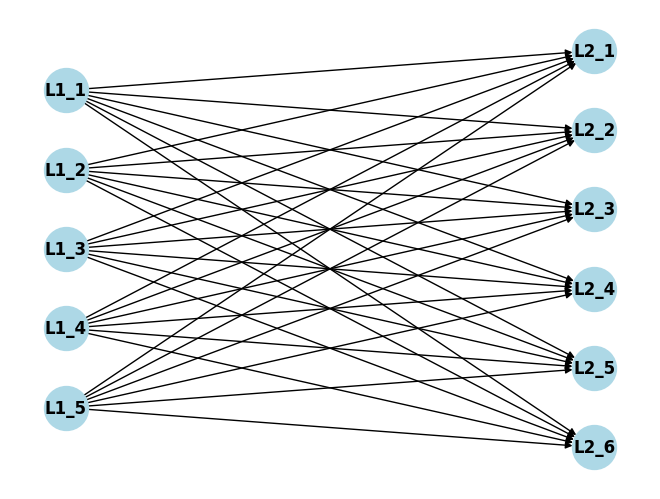

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_mlp():
    G = nx.DiGraph()

    # Layer 1 (Input Layer)
    input_layer = [1, 2, 3, 4, 5]
    for node in input_layer:
        G.add_node(f'L1_{node}', layer=1)

    # Layer 2 (Hidden Layer)
    hidden_layer = [1, 2, 3, 4, 5, 6]
    for node in hidden_layer:
        G.add_node(f'L2_{node}', layer=2)


    # Edges between Input and Hidden layers
    for input_node in input_layer:
        for hidden_node in hidden_layer:
            G.add_edge(f'L1_{input_node}', f'L2_{hidden_node}')

    pos = nx.multipartite_layout(G, subset_key="layer")
    nx.draw(G, pos, with_labels=True, node_color="lightblue", font_weight="bold", node_size=1000)
    plt.show()
plot_mlp()

In [ ]:
import site
import os

package_name = "ultralytics"
site_package_path = site.getsitepackages()[0]
package_path = os.path.join(site_package_path, package_name)

print(package_path)

/usr/local/lib/python3.10/dist-packages/ultralytics


In [3]:
from ultralytics import YOLO

In [2]:
import os
for s in range(1,6):
    train = os.listdir(f'/content/drive/MyDrive/Volcano/dataset/split{s}/train/images')
    test = os.listdir(f'/content/drive/MyDrive/Volcano/dataset/split{s}/test/images')
    train1 = os.listdir(f'/content/drive/MyDrive/Volcano/dataset/split{s}/train/labels')
    test1 = os.listdir(f'/content/drive/MyDrive/Volcano/dataset/split{s}/test/labels')
    print(len(train)+len(test),len(train1)+len(test1))

593 593
593 593
593 593
593 593
593 593


## yolo8s

In [5]:
#
from ultralytics import YOLO
model = YOLO("yolov8s.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,name='yolo8s',
            )

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Volcano/training/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2827495d80>
fitness: 0.37163845674517554
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.32926])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.7294605076806483, 'metrics/recall(B)': 0.712, 'metrics/mAP50(B)': 0.7530196396252276, 'metrics/mAP50-95(B)': 0.3292627697585031, 'fitness': 0.37163845674517554}
save_dir: PosixPath('runs/detect/yolo8s')
speed: {'preprocess': 0.15046015507032892, 'inference': 1.675872241749483, 'loss': 0.0013984551950663078, 'postprocess': 2.412812048647584}

## yolo8n data augmentation

In [6]:
#
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,name='yolo8n_noaugment',
            scale=0.,mosaic=0,translate=0,
            fliplr=0
            )

New https://pypi.org/project/ultralytics/8.0.170 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8n_noaugment, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, lin

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b27b1e8f700>
fitness: 0.2624280405626919
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.2301])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.5933604093956322, 'metrics/recall(B)': 0.552, 'metrics/mAP50(B)': 0.5533449756897016, 'metrics/mAP50-95(B)': 0.2301039366596908, 'fitness': 0.2624280405626919}
save_dir: PosixPath('runs/detect/yolo8n_noaugment')
speed: {'preprocess': 0.1843917269666656, 'inference': 0.7742993971880744, 'loss': 0.0006090693113182773, 'postprocess': 1.2301897802272765}

In [2]:
#
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,name='yolo8n_mosaic',
            scale=0,mosaic=1,translate=0,
            fliplr=0
            )

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8n_mosaic, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b27c03f2e90>
fitness: 0.28977182749647656
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.25233])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.701740786623953, 'metrics/recall(B)': 0.656, 'metrics/mAP50(B)': 0.6267278472175548, 'metrics/mAP50-95(B)': 0.2523322697496901, 'fitness': 0.28977182749647656}
save_dir: PosixPath('runs/detect/yolo8n_mosaic3')
speed: {'preprocess': 0.18354223555877427, 'inference': 0.876160228953642, 'loss': 0.000571002479360885, 'postprocess': 1.1618197465143283}

In [3]:
#
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,name='yolo8n_scale',
            scale=0.5,mosaic=1,translate=0,
            fliplr=0
            )

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8n_scale, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b27c01ccd00>
fitness: 0.34839613430477334
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.30756])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.7476681448739594, 'metrics/recall(B)': 0.652, 'metrics/mAP50(B)': 0.7159185866169628, 'metrics/mAP50-95(B)': 0.30756030627008557, 'fitness': 0.34839613430477334}
save_dir: PosixPath('runs/detect/yolo8n_scale')
speed: {'preprocess': 0.25977807886460247, 'inference': 0.7876969185196051, 'loss': 0.0006070657938468355, 'postprocess': 1.117832520428826}

In [4]:
#
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,name='yolo8n_translate',
            scale=0.5,mosaic=1,translate=0.1,
            fliplr=0
            )

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8n_translate, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, bo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b27c009e350>
fitness: 0.3597165365862032
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.3193])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.7164741735742197, 'metrics/recall(B)': 0.688, 'metrics/mAP50(B)': 0.7234698548902704, 'metrics/mAP50-95(B)': 0.31929950121908457, 'fitness': 0.3597165365862032}
save_dir: PosixPath('runs/detect/yolo8n_translate')
speed: {'preprocess': 0.15500613621303014, 'inference': 0.7799052390731683, 'loss': 0.0008534984428341649, 'postprocess': 1.0545373964710396}

## yolo8n

In [4]:
#
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,name='noaugment',
            scale=0,mosaic=0,translate=0,
            fliplr=0
            )

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=noaugment, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x795525b05240>
fitness: 0.27639214659406874
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.24261])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.6743346798188103, 'metrics/recall(B)': 0.544, 'metrics/mAP50(B)': 0.5804430134250921, 'metrics/mAP50-95(B)': 0.24260871694617725, 'fitness': 0.27639214659406874}
save_dir: PosixPath('runs/detect/noaugment')
speed: {'preprocess': 0.1954010554722377, 'inference': 2.477445522276293, 'loss': 0.0009055898970916492, 'postprocess': 1.3338056932978268}

In [10]:
#
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s5.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='s5')

100%|██████████| 6.23M/6.23M [00:00<00:00, 83.3MB/s]
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data_s5.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=s5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=F

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c5454e7bd60>
fitness: 0.3849169990840007
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.3413])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.7136158299148051, 'metrics/recall(B)': 0.7310344827586207, 'metrics/mAP50(B)': 0.777433546702904, 'metrics/mAP50-95(B)': 0.34130404934856695, 'fitness': 0.3849169990840007}
save_dir: PosixPath('runs/detect/s5')
speed: {'preprocess': 0.15719935425326356, 'inference': 0.8298392988677717, 'loss': 0.0007702754094050481, 'postprocess': 1.1194913815229368}

In [3]:
# copy_paste + 300 epoch
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data.yaml', epochs=300, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='300ep')

Ultralytics YOLOv8.0.166 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=300ep, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8f9c7c6080>
fitness: 0.3544409006464141
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.31444])
names: {0: 'plume'}
plot: True
results_dict: {'metrics/precision(B)': 0.6665404511265077, 'metrics/recall(B)': 0.7275880324769214, 'metrics/mAP50(B)': 0.7144532890725521, 'metrics/mAP50-95(B)': 0.314439524154621, 'fitness': 0.3544409006464141}
save_dir: PosixPath('runs/detect/300ep')
speed: {'preprocess': 7.17741301079758, 'inference': 3.399295967166163, 'loss': 0.0010979275743500524, 'postprocess': 3.1018878231529428}

In [2]:
# best model for large image testing
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Volcano/runs/detect/yolo8n_copyp/weights/best.pt")
model.val(data='/content/drive/MyDrive/Volcano/training/data.yaml',imgsz=640)

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
100%|██████████| 755k/755k [00:00<00:00, 56.6MB/s]
val: Scanning /content/drive/MyDrive/Volcano/dataset/split1/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                   all        119        250      0.738      0.744      0.763      0.326
Speed: 5.0ms preprocess, 11.9ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e796d2d1720>
fitness: 0.36938894219343593
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.32565])
names: {0: 'plume'}
plot: True
results_dict: {'metrics/precision(B)': 0.7381935842776784, 'metrics/recall(B)': 0.7443800096489491, 'metrics/mAP50(B)': 0.7630796558246855, 'metrics/mAP50-95(B)': 0.3256455295677415, 'fitness': 0.36938894219343593}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 4.9635402294768, 'inference': 11.917092219120315, 'loss': 0.0012461878672367385, 'postprocess': 4.130046908594981}

In [3]:
model.val(data='/content/drive/MyDrive/Volcano/training/data.yaml',imgsz=960)

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split1/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]
                   all        119        250      0.714      0.669        0.7      0.289
Speed: 9.5ms preprocess, 12.0ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e791afe15a0>
fitness: 0.3305891757259781
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.2895])
names: {0: 'plume'}
plot: True
results_dict: {'metrics/precision(B)': 0.7139941242629456, 'metrics/recall(B)': 0.6690469786996642, 'metrics/mAP50(B)': 0.7004239737477984, 'metrics/mAP50-95(B)': 0.2894964203902203, 'fitness': 0.3305891757259781}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 9.510136452041754, 'inference': 11.958561023744215, 'loss': 0.0018372255213120405, 'postprocess': 4.162950676028468}

In [5]:
model.val(data='/content/drive/MyDrive/Volcano/training/data.yaml',imgsz=480)

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split1/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]
                   all        119        250      0.758       0.68      0.751       0.32
Speed: 3.1ms preprocess, 8.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e791ddb1ed0>
fitness: 0.3628735396854839
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.31977])
names: {0: 'plume'}
plot: True
results_dict: {'metrics/precision(B)': 0.7578414451563803, 'metrics/recall(B)': 0.68, 'metrics/mAP50(B)': 0.7508464845172252, 'metrics/mAP50-95(B)': 0.31976543470417934, 'fitness': 0.3628735396854839}
save_dir: PosixPath('runs/detect/val4')
speed: {'preprocess': 3.0620739239604533, 'inference': 8.21288293149291, 'loss': 0.0013583848456374737, 'postprocess': 3.111721086902779}

In [10]:
model.val(data='/content/drive/MyDrive/Volcano/training/data.yaml',imgsz=640,conf=0.3,iou=0.5)

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split1/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]
                   all        119        250      0.787      0.756      0.787      0.359
Speed: 3.7ms preprocess, 6.9ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/val9


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7916326680>
fitness: 0.4016120523212087
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.3588])
names: {0: 'plume'}
plot: True
results_dict: {'metrics/precision(B)': 0.7875, 'metrics/recall(B)': 0.756, 'metrics/mAP50(B)': 0.7869593332146536, 'metrics/mAP50-95(B)': 0.35879568777749266, 'fitness': 0.4016120523212087}
save_dir: PosixPath('runs/detect/val9')
speed: {'preprocess': 3.7293153650620403, 'inference': 6.940821639629973, 'loss': 0.0027848892853039654, 'postprocess': 4.481982784110959}

## random split cross validation

In [2]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/random_s1.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8n_random_s1')

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/random_s1.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8n_random_s1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4b923e97e0>
fitness: 0.3473183774232397
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.30818])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.7016146019929269, 'metrics/recall(B)': 0.6073298429319371, 'metrics/mAP50(B)': 0.6995389763121889, 'metrics/mAP50-95(B)': 0.30818275532446754, 'fitness': 0.3473183774232397}
save_dir: PosixPath('runs/detect/yolo8n_random_s1')
speed: {'preprocess': 0.20335702335133274, 'inference': 2.749517184345662, 'loss': 0.0007513190517906382, 'postprocess': 1.3709629283231848}

In [3]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/random_s2.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8n_random_s2')

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/random_s2.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8n_random_s2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4b59ddd420>
fitness: 0.3242139154875313
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.28322])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.70638219438691, 'metrics/recall(B)': 0.6433566433566433, 'metrics/mAP50(B)': 0.6931653117884274, 'metrics/mAP50-95(B)': 0.2832193158985429, 'fitness': 0.3242139154875313}
save_dir: PosixPath('runs/detect/yolo8n_random_s2')
speed: {'preprocess': 0.22556801803973542, 'inference': 2.5836620010247753, 'loss': 0.0008575054777770483, 'postprocess': 1.0168332011759782}

In [4]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/random_s3.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8n_random_s3')

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/random_s3.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8n_random_s3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4b47ee6350>
fitness: 0.3586732843664713
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.31497])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.7790491970272609, 'metrics/recall(B)': 0.6666666666666666, 'metrics/mAP50(B)': 0.752007731566513, 'metrics/mAP50-95(B)': 0.31496945689979994, 'fitness': 0.3586732843664713}
save_dir: PosixPath('runs/detect/yolo8n_random_s3')
speed: {'preprocess': 0.20893481599182642, 'inference': 2.391069877047499, 'loss': 0.0018612677309693408, 'postprocess': 1.036984579903739}

In [5]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/random_s4.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8n_random_s4')

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/random_s4.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8n_random_s4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4b3d811ea0>
fitness: 0.3775116955110167
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.34067])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.7106254586307778, 'metrics/recall(B)': 0.6683417085427136, 'metrics/mAP50(B)': 0.7091191107978255, 'metrics/mAP50-95(B)': 0.3406664271458157, 'fitness': 0.3775116955110167}
save_dir: PosixPath('runs/detect/yolo8n_random_s4')
speed: {'preprocess': 0.21661742258880098, 'inference': 2.7762833288160422, 'loss': 0.0008748749555167506, 'postprocess': 3.1467716572648388}

In [19]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/random_s5.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8n_random_s5')

New https://pypi.org/project/ultralytics/8.0.170 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/random_s5.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8n_random_s5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d250159ad10>
fitness: 0.2963316655399495
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.25833])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.6361930059796455, 'metrics/recall(B)': 0.6425531914893617, 'metrics/mAP50(B)': 0.6383376327425924, 'metrics/mAP50-95(B)': 0.25833100251743357, 'fitness': 0.2963316655399495}
save_dir: PosixPath('runs/detect/yolo8n_random_s5')
speed: {'preprocess': 0.2559888160834878, 'inference': 1.0772155503095207, 'loss': 0.001000145734366724, 'postprocess': 1.880019398058875}

## cross validation

In [3]:
## predict on different volcanos
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s1.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='s1')

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data_s1.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=s1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0b283a1660>
fitness: 0.24459537703208495
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.20824])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.5733560480722504, 'metrics/recall(B)': 0.5255681818181818, 'metrics/mAP50(B)': 0.5718171772438418, 'metrics/mAP50-95(B)': 0.2082373992307786, 'fitness': 0.24459537703208495}
save_dir: PosixPath('runs/detect/s1')
speed: {'preprocess': 0.2077408950694286, 'inference': 2.601153659124444, 'loss': 0.0007413599612939096, 'postprocess': 1.9485045523539075}

In [4]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s2.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='s2')

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data_s2.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=s2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0afa0c8730>
fitness: 0.24915250533638572
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.21989])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.5520650256621781, 'metrics/recall(B)': 0.5339805825242718, 'metrics/mAP50(B)': 0.5125205745864901, 'metrics/mAP50-95(B)': 0.21988938653081855, 'fitness': 0.24915250533638572}
save_dir: PosixPath('runs/detect/s2')
speed: {'preprocess': 0.19593536853790283, 'inference': 2.701135618346078, 'loss': 0.000666294779096331, 'postprocess': 1.255171639578683}

In [5]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s3.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='s3')

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data_s3.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=s3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0ab7f70e80>
fitness: 0.2434056609378572
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.21499])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.628526388691621, 'metrics/recall(B)': 0.49176253959346283, 'metrics/mAP50(B)': 0.4991428393599925, 'metrics/mAP50-95(B)': 0.21499041889095327, 'fitness': 0.2434056609378572}
save_dir: PosixPath('runs/detect/s3')
speed: {'preprocess': 0.27557041334069293, 'inference': 2.8155057326607085, 'loss': 0.0006115954855213994, 'postprocess': 2.0917415618896484}

In [6]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s4.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='s4')

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data_s4.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=s4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0aed29ad10>
fitness: 0.2793250321081256
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.24368])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.5718185702028604, 'metrics/recall(B)': 0.6115107913669064, 'metrics/mAP50(B)': 0.6001711757097156, 'metrics/mAP50-95(B)': 0.2436754605968378, 'fitness': 0.2793250321081256}
save_dir: PosixPath('runs/detect/s4')
speed: {'preprocess': 0.29683964593069895, 'inference': 2.720496484211513, 'loss': 0.0007046120507376534, 'postprocess': 2.2519975900650024}

In [1]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s5.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='s5')

100%|██████████| 6.23M/6.23M [00:00<00:00, 182MB/s]
New https://pypi.org/project/ultralytics/8.0.168 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/data_s5.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=s5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7d0f5dada0>
fitness: 0.39611901797000404
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.35203])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.7766799203921928, 'metrics/recall(B)': 0.7310344827586207, 'metrics/mAP50(B)': 0.7929359296215652, 'metrics/mAP50-95(B)': 0.3520282500087194, 'fitness': 0.39611901797000404}
save_dir: PosixPath('runs/detect/s5')
speed: {'preprocess': 0.18752130687746227, 'inference': 2.6262193663507443, 'loss': 0.0006561605339376335, 'postprocess': 0.8071141365246896}

## yolo8m

In [2]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s1.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8m_s1')

100%|██████████| 49.7M/49.7M [00:01<00:00, 50.7MB/s]
New https://pypi.org/project/ultralytics/8.0.168 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Volcano/training/data_s1.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8m_s1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, v

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7d0f389000>
fitness: 0.2271742817881755
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.19323])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.48393983887966535, 'metrics/recall(B)': 0.5454545454545454, 'metrics/mAP50(B)': 0.532652570923901, 'metrics/mAP50-95(B)': 0.19323224966198377, 'fitness': 0.2271742817881755}
save_dir: PosixPath('runs/detect/yolo8m_s1')
speed: {'preprocess': 0.17893749431972086, 'inference': 9.801429553623619, 'loss': 0.0007848670012759467, 'postprocess': 0.8567127868206832}

In [3]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s2.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8m_s2')

New https://pypi.org/project/ultralytics/8.0.168 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Volcano/training/data_s2.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8m_s2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7d12f69420>
fitness: 0.2368330364332553
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.20343])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.5590645122734675, 'metrics/recall(B)': 0.5436893203883495, 'metrics/mAP50(B)': 0.5374698776431168, 'metrics/mAP50-95(B)': 0.20342894296549288, 'fitness': 0.2368330364332553}
save_dir: PosixPath('runs/detect/yolo8m_s2')
speed: {'preprocess': 0.28452915804726736, 'inference': 9.901189378329686, 'loss': 0.0006513936179024833, 'postprocess': 1.9931559051786152}

In [4]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s3.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8m_s3')

New https://pypi.org/project/ultralytics/8.0.168 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Volcano/training/data_s3.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8m_s3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7d0f176380>
fitness: 0.21909451474613723
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.19215])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.5471969504548503, 'metrics/recall(B)': 0.49410740790051133, 'metrics/mAP50(B)': 0.46163761841030676, 'metrics/mAP50-95(B)': 0.19214528100567393, 'fitness': 0.21909451474613723}
save_dir: PosixPath('runs/detect/yolo8m_s3')
speed: {'preprocess': 0.33722960430642834, 'inference': 9.712096919184145, 'loss': 0.0007090361221976902, 'postprocess': 1.1487172997516135}

In [5]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s4.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8m_s4')

New https://pypi.org/project/ultralytics/8.0.168 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Volcano/training/data_s4.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8m_s4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7d0f5d8eb0>
fitness: 0.2927626257356826
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.25922])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.5522221648347775, 'metrics/recall(B)': 0.5899280575539568, 'metrics/mAP50(B)': 0.5946272921486488, 'metrics/mAP50-95(B)': 0.25922210724535305, 'fitness': 0.2927626257356826}
save_dir: PosixPath('runs/detect/yolo8m_s4')
speed: {'preprocess': 0.293239951133728, 'inference': 9.91934325013842, 'loss': 0.0007131269999912807, 'postprocess': 1.0785332747868128}

In [2]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/data_s5.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='yolo8m_s5')

Ultralytics YOLOv8.0.168 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Volcano/training/data_s5.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo8m_s5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9769e6b700>
fitness: 0.3325305356292806
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.29139])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.6952813637418986, 'metrics/recall(B)': 0.7034482758620689, 'metrics/mAP50(B)': 0.702787054905161, 'metrics/mAP50-95(B)': 0.29139092237640496, 'fitness': 0.3325305356292806}
save_dir: PosixPath('runs/detect/yolo8m_s5')
speed: {'preprocess': 0.19909785344050482, 'inference': 9.784345952873556, 'loss': 0.0006418961745042067, 'postprocess': 1.0376159961407}

## yolo8l

## yolo8x

## time series

In [6]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Volcano/training/date.yaml', epochs=100, imgsz=640,
            hsv_h=0,hsv_s=0,hsv_v=0,copy_paste=0.5,name='time_series')

Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Volcano/training/date.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=time_series, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c7b3149c7c0>
fitness: 0.27382568976977195
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.23947])
names: {0: 'plume'}
plot: False
results_dict: {'metrics/precision(B)': 0.5987440431884876, 'metrics/recall(B)': 0.6019968466320398, 'metrics/mAP50(B)': 0.5830180677244934, 'metrics/mAP50-95(B)': 0.23947098110813622, 'fitness': 0.27382568976977195}
save_dir: PosixPath('runs/detect/time_series')
speed: {'preprocess': 0.22293767358502772, 'inference': 0.8293869148971688, 'loss': 0.0007417466905381945, 'postprocess': 1.2592576507829192}

## Hyperparameters

In [4]:
# best model for large image testing
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Volcano/runs/detect/yolo8n_copyp/weights/best.pt")
r = model.val(data='/content/drive/MyDrive/Volcano/training/data.yaml',imgsz=640,name='delete/hyper',save=False)

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                   all        119        250      0.754      0.712      0.752      0.321
Speed: 9.6ms preprocess, 7.5ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/delete/hyper2


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Volcano/runs/detect/yolo8n_copyp/weights/best.pt")
best_conf = 0
best_score = 0
scores = []
for i in range(80):
    score = (1+i)/100
    r = model.val(data='/content/drive/MyDrive/Volcano/training/data.yaml',
                  imgsz=640,name='delete/hyper',conf=conf)
    if r.results_dict['metrics/mAP50(B)'] > best_score:
        best_score = r.results_dict['metrics/mAP50(B)']
        best_conf = conf
        print(f'new best conf{best_conf}, score{best_score}')
    scores.append(r.results_dict['metrics/mAP50(B)'])

In [4]:
%cd /content

/content


In [5]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Volcano/runs/detect/yolo8n_copyp/weights/best.pt")
best_iou = 0
best_score = 0
scores_iou = []
for i in range(20,90):
    iou = (1+i)/100
    r = model.val(data='/content/drive/MyDrive/Volcano/training/data.yaml',
                  imgsz=640,name='delete/hyper',conf=0.08,iou=iou)
    if r.results_dict['metrics/mAP50(B)'] > best_score:
        best_score = r.results_dict['metrics/mAP50(B)']
        best_iou = iou
        print(f'new best conf{best_iou}, score{best_score}')
    scores_iou.append(r.results_dict['metrics/mAP50(B)'])

Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]
                   all        119        250      0.806      0.704      0.766      0.349
Speed: 3.5ms preprocess, 4.7ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/delete/hyper19
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)


new best conf0.21, score0.7660489906665645


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]
                   all        119        250      0.808      0.704      0.767      0.349
Speed: 6.5ms preprocess, 3.7ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/delete/hyper20
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)


new best conf0.22, score0.7673053918457649


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]
                   all        119        250      0.808      0.704      0.767      0.347
Speed: 7.1ms preprocess, 3.3ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/delete/hyper21
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]
                   all        119        250      0.804      0.708      0.767      0.348
Sp

new best conf0.25, score0.769447149810751


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                   all        119        250      0.806      0.712      0.769      0.349
Speed: 8.0ms preprocess, 7.6ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/delete/hyper24
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]
                   all        119        250      0.806      0.712      0.769      0.349
Sp

new best conf0.28, score0.7702861633897597


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]
                   all        119        250      0.806      0.712       0.77       0.35
Speed: 7.1ms preprocess, 4.1ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/delete/hyper27
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]
                   all        119        250      0.806      0.712      0.772       0.35
Sp

new best conf0.3, score0.7715549903535187


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]
                   all        119        250      0.806      0.712      0.772       0.35
Speed: 7.6ms preprocess, 5.2ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/delete/hyper29
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)


new best conf0.31, score0.7719463098532001


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]
                   all        119        250      0.803      0.712      0.772       0.35
Speed: 5.0ms preprocess, 3.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/delete/hyper30
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]
                   all        119        250      0.803      0.712      0.773      0.351
Sp

new best conf0.33, score0.7733548233353871


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]
                   all        119        250      0.803      0.712      0.775      0.352
Speed: 7.6ms preprocess, 5.1ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/delete/hyper32
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)


new best conf0.34, score0.7749784716380891


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]
                   all        119        250      0.803      0.712      0.775      0.352
Speed: 5.3ms preprocess, 3.0ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/delete/hyper33
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]
                   all        119        250      0.803      0.712      0.775      0.352
Sp

new best conf0.37, score0.7749881407777115


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]
                   all        119        250      0.807      0.708      0.775       0.35
Speed: 3.3ms preprocess, 5.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/delete/hyper36
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]
                   all        119        250      0.803      0.712      0.776      0.351
Sp

new best conf0.39, score0.7756301237961043


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]
                   all        119        250      0.803      0.712      0.775      0.351
Speed: 6.6ms preprocess, 2.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/delete/hyper38
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]
                   all        119        250      0.803      0.712      0.775      0.351
Sp

new best conf0.43, score0.7771784982635563


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]
                   all        119        250      0.807      0.708      0.777      0.351
Speed: 5.4ms preprocess, 3.2ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/delete/hyper42
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]
                   all        119        250      0.807      0.708      0.778      0.352
Sp

new best conf0.45, score0.7783967065415905


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]
                   all        119        250      0.807      0.708      0.778      0.351
Speed: 10.9ms preprocess, 4.9ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/delete/hyper44
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]
                   all        119        250      0.808      0.708      0.778      0.351
S

new best conf0.51, score0.7799314841833448


val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]
                   all        119        250      0.797      0.716      0.779      0.351
Speed: 3.8ms preprocess, 4.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/delete/hyper50
Ultralytics YOLOv8.0.169 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/drive/MyDrive/Volcano/dataset/split0/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]
                   all        119        250      0.805      0.712      0.776      0.352
Sp

In [8]:
scores = [0.7565068043544194,
 0.7581740534647572,
 0.755308359880168,
 0.7552853281744991,
 0.7561697124490904,
 0.7567452560556321,
 0.7590092644257787,
 0.7598943223374764,
 0.7584467695333178,
 0.7589433886929315,
 0.756713476920756,
 0.7574401456636193,
 0.7562562627079257,
 0.7563348161451912,
 0.7557981321538101,
 0.7549077000550444,
 0.7546392593454272,
 0.7546392593454272,
 0.7544201269556292,
 0.7556300833437748,
 0.7563759468707137,
 0.7564296388694061,
 0.7567118402446265,
 0.7566231887960853,
 0.753903473033168,
 0.7530127848026813,
 0.7524288077945561,
 0.7500231697164665,
 0.7514785892968862,
 0.752599885316042,
 0.7513567258661993,
 0.7481761477060813,
 0.7469666865504713,
 0.7465748398122418,
 0.7474374358628079,
 0.7483142310253172,
 0.7475294762000695,
 0.7463398301538575,
 0.7460488553730134,
 0.7458102211823243,
 0.7429493887523986,
 0.7411034889240224,
 0.7388561427775939,
 0.7371022739550658,
 0.7377519955495198,
 0.7383565717464039,
 0.7360232515268517,
 0.7331602505799275,
 0.7320764613670045,
 0.7317005016126304,
 0.7306276845294909,
 0.7328641887709773,
 0.7299713117104905,
 0.7289438045011629,
 0.7260933374785101,
 0.723283301089268,
 0.7194697154492985,
 0.7194697154492985,
 0.7176231119163495,
 0.7167988378793321,
 0.7083688883980533,
 0.7064538650142953,
 0.7018871957664666,
 0.699900142541501,
 0.6948678442835304,
 0.6909589222799662,
 0.6798402615307488,
 0.6754393939393939,
 0.666332044181309,
 0.6437145322497532,
 0.6217702628844162,
 0.6069149035298929,
 0.593138167689798,
 0.5793751122781732,
 0.5762776576962048,
 0.5616686445658631,
 0.5517358330716492,
 0.5496210442075488,
 0.5474563081556106,
 0.5365816600220065]


In [6]:
best_score,best_conf

(0.7598943223374764, 0.08)

In [5]:
best_score,best_iou

(0.7799314841833448, 0.51)

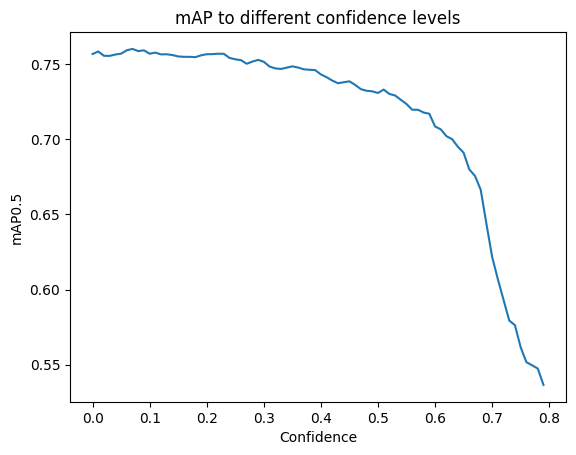

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([i/100 for i in range(80)],scores)
ax.set_xlabel('Confidence')
ax.set_ylabel('mAP0.5')
ax.set_title('mAP to different confidence levels')
plt.savefig('confidence.jpg')
plt.show()

In [9]:
len(scores)

80

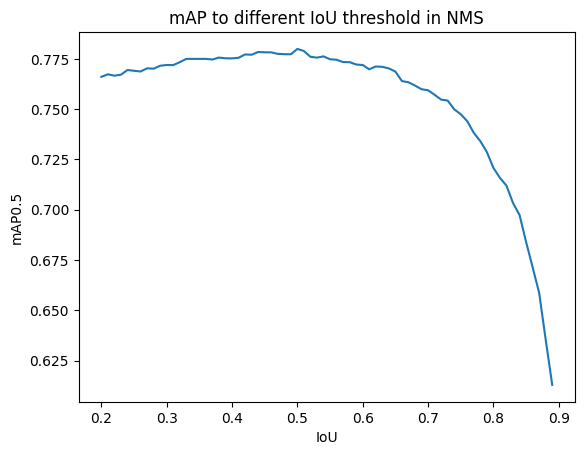

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([i/100 for i in range(20,90)],scores_iou)
ax.set_xlabel('IoU')
ax.set_ylabel('mAP0.5')
ax.set_title('mAP to different IoU threshold in NMS')
plt.savefig('iou.jpg')
plt.show()

In [14]:
scores_iou

[0.7660489906665645,
 0.7673053918457649,
 0.7666238150605904,
 0.7671060731127957,
 0.769447149810751,
 0.7690611837310045,
 0.7687054149829785,
 0.7702861633897597,
 0.7701128664038124,
 0.7715549903535187,
 0.7719463098532001,
 0.7718756320229315,
 0.7733548233353871,
 0.7749784716380891,
 0.7749784716380891,
 0.7749784716380891,
 0.7749881407777115,
 0.7746628655851625,
 0.7756301237961043,
 0.7752656492940322,
 0.7752152706290157,
 0.7755313508385042,
 0.7771784982635563,
 0.7770510754915867,
 0.7783967065415905,
 0.7782504319241799,
 0.7782169481295964,
 0.7774737064396569,
 0.7773096328902301,
 0.7772591329886301,
 0.7799314841833448,
 0.7788880447076373,
 0.7760194456202115,
 0.7755950905251557,
 0.7762323964232033,
 0.7747944966717538,
 0.7745550390181279,
 0.7733760043599995,
 0.7733545705839946,
 0.7721860836280159,
 0.7719394184249597,
 0.7697999673556294,
 0.7711973057275633,
 0.7710321154077562,
 0.7702330962735782,
 0.7686739008481261,
 0.763935867062783,
 0.763354940502

In [4]:
# best model testing
from ultralytics import YOLO
rs = []
for i in range(1,6):
    model = YOLO(f"/content/drive/MyDrive/Volcano/runs/detect/s{i}/weights/best.pt")
    r = model.val(data=f'/content/drive/MyDrive/Volcano/training/data_s{i}.yaml',imgsz=640,name='delete/hyper',save=False,conf=0.08,iou=0.51)
    rs.append(r)
    print('result',r.results_dict['metrics/mAP50(B)'])

Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/dataset/split1/test/labels.cache... 137 images, 0 backgrounds, 0 corrupt: 100%|██████████| 137/137 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.37it/s]
                   all        137        352      0.591      0.616      0.616      0.232
Speed: 3.7ms preprocess, 6.2ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/delete/hyper6


result 0.6156292161380222


Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/dataset/split2/test/labels.cache... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]
                   all        112        206      0.576      0.544      0.553      0.243
Speed: 4.3ms preprocess, 5.9ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/delete/hyper7


result 0.5531116947551998


Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/dataset/split3/test/labels.cache... 115 images, 0 backgrounds, 0 corrupt: 100%|██████████| 115/115 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]
                   all        115        203      0.592      0.488      0.523      0.239
Speed: 5.0ms preprocess, 6.1ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/delete/hyper8


result 0.5227714872969702


Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/dataset/split4/test/labels.cache... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]
                   all        112        278       0.61      0.655      0.632      0.271
Speed: 3.6ms preprocess, 5.1ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/delete/hyper9


result 0.6319676367508351


Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/dataset/split5/test/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]
                   all        117        145      0.699      0.752      0.773      0.355
Speed: 4.6ms preprocess, 8.7ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/delete/hyper10


result 0.7734664506985773


In [2]:
p = (0.591+0.576+0.592+0.61+0.699)/5
r = (0.616+0.544+0.488+0.655+0.752)/5
map = (0.616+0.553+0.523+0.632+0.773)/5
map,r,p

(0.6194000000000001, 0.611, 0.6135999999999999)

In [3]:
# best model testing
from ultralytics import YOLO
rs = []
for i in range(1,6):
    model = YOLO(f"/content/drive/MyDrive/Volcano/runs/detect/yolo8n_random_s{i}/weights/best.pt")
    r = model.val(data=f'/content/drive/MyDrive/Volcano/training/random_s{i}.yaml',imgsz=640,name='delete/hyper',save=False,conf=0.08,iou=0.51)
    rs.append(r)
    print('original conf',r.results_dict['metrics/mAP50(B)'])

Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
100%|██████████| 755k/755k [00:00<00:00, 15.6MB/s]
val: Scanning /content/drive/MyDrive/Volcano/random_split_folders/split1/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]
                   all        119        191      0.705      0.639      0.725      0.333
Speed: 8.6ms preprocess, 7.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/delete/hyper


original conf 0.7245978029183037


Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/random_split_folders/split2/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]
                   all        119        286      0.739      0.643      0.709      0.299
Speed: 5.0ms preprocess, 3.6ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/delete/hyper2


original conf 0.7092225055503131


Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/random_split_folders/split3/test/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]
                   all        119        273      0.756      0.772      0.773      0.337
Speed: 4.2ms preprocess, 3.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/delete/hyper3


original conf 0.7733420131066892


Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/random_split_folders/split4/test/labels.cache... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]
                   all        118        199      0.743      0.704      0.748      0.367
Speed: 2.4ms preprocess, 5.0ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/delete/hyper4


original conf 0.7478988429688469


Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/random_split_folders/split5/test/labels.cache... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]
                   all        118        235      0.661       0.66      0.652      0.273
Speed: 7.3ms preprocess, 3.6ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/delete/hyper5


original conf 0.6516339477753682


In [5]:
p = (0.705+0.739+0.756+0.743+0.661)/5
r = (0.639+0.643+0.772+0.704+0.66)/5
map = (0.725+0.709+0.773+0.748+0.652)/5
map,r,p

(0.7214, 0.6836, 0.7208)

In [23]:
!cp -r /content/runs/detect/yolo8n_random_s5 /content/drive/MyDrive/Volcano/runs/detect/

In [7]:
# best model for large image testing
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Volcano/runs/detect/time_series/weights/best.pt")
r = model.val(data='/content/drive/MyDrive/Volcano/training/date.yaml',imgsz=640,name='delete/hyper',save=False,conf=0.08,iou=0.51)

Ultralytics YOLOv8.0.170 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Volcano/dataset/date_split/test/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]
                   all        117        233      0.608      0.652      0.621      0.262
Speed: 8.2ms preprocess, 8.0ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/delete/hyper11


## visualization

In [18]:
import cv2
from PIL import Image
import numpy as np
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image,
                label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                0,
                lw / 3,
                txt_color,
                thickness=tf,
                lineType=cv2.LINE_AA)


def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  #Define COCO Labels
  if labels == []:
    labels = {0: u'plume',1:'plume'}
  #Define colors
  if colors == []:
    #colors = [(6, 112, 83), (253, 246, 160), (40, 132, 70), (205, 97, 162), (149, 196, 30), (106, 19, 161), (127, 175, 225), (115, 133, 176), (83, 156, 8), (182, 29, 77), (180, 11, 251), (31, 12, 123), (23, 6, 115), (167, 34, 31), (176, 216, 69), (110, 229, 222), (72, 183, 159), (90, 168, 209), (195, 4, 209), (135, 236, 21), (62, 209, 199), (87, 1, 70), (75, 40, 168), (121, 90, 126), (11, 86, 86), (40, 218, 53), (234, 76, 20), (129, 174, 192), (13, 18, 254), (45, 183, 149), (77, 234, 120), (182, 83, 207), (172, 138, 252), (201, 7, 159), (147, 240, 17), (134, 19, 233), (202, 61, 206), (177, 253, 26), (10, 139, 17), (130, 148, 106), (174, 197, 128), (106, 59, 168), (124, 180, 83), (78, 169, 4), (26, 79, 176), (185, 149, 150), (165, 253, 206), (220, 87, 0), (72, 22, 226), (64, 174, 4), (245, 131, 96), (35, 217, 142), (89, 86, 32), (80, 56, 196), (222, 136, 159), (145, 6, 219), (143, 132, 162), (175, 97, 221), (72, 3, 79), (196, 184, 237), (18, 210, 116), (8, 185, 81), (99, 181, 254), (9, 127, 123), (140, 94, 215), (39, 229, 121), (230, 51, 96), (84, 225, 33), (218, 202, 139), (129, 223, 182), (167, 46, 157), (15, 252, 5), (128, 103, 203), (197, 223, 199), (19, 238, 181), (64, 142, 167), (12, 203, 242), (69, 21, 41), (177, 184, 2), (35, 97, 56), (241, 22, 161)]
    colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),(167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),(204, 79, 135),(136, 126, 185),(209, 213, 45),(44, 52, 10),(101, 158, 121),(179, 124, 12),(25, 33, 189),(45, 115, 11),(73, 197, 184),(62, 225, 221),(32, 46, 52),(20, 165, 16),(54, 15, 57),(12, 150, 9),(10, 46, 99),(94, 89, 46),(48, 37, 106),(42, 10, 96),(7, 164, 128),(98, 213, 120),(40, 5, 219),(54, 25, 150),(251, 74, 172),(0, 236, 196),(21, 104, 190),(226, 74, 232),(120, 67, 25),(191, 106, 197),(8, 15, 134),(21, 2, 1),(142, 63, 109),(133, 148, 146),(187, 77, 253),(155, 22, 122),(218, 130, 77),(164, 102, 79),(43, 152, 125),(185, 124, 151),(95, 159, 238),(128, 89, 85),(228, 6, 60),(6, 41, 210),(11, 1, 133),(30, 96, 58),(230, 136, 109),(126, 45, 174),(164, 63, 165),(32, 111, 29),(232, 40, 70),(55, 31, 198),(148, 211, 129),(10, 186, 211),(181, 201, 94),(55, 35, 92),(129, 140, 233),(70, 250, 116),(61, 209, 152),(216, 21, 138),(100, 0, 176),(3, 42, 70),(151, 13, 44),(216, 102, 88),(125, 216, 93),(171, 236, 47),(253, 127, 103),(205, 137, 244),(193, 137, 224),(36, 152, 214),(17, 50, 238),(154, 165, 67),(114, 129, 60),(119, 24, 48),(73, 8, 110)]

  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    #filter every box under conf threshold if conf threshold setted
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  #show image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  pil_image = Image.fromarray(np.uint8(image))
  #cv2.imshow("image",image) #if used in Python
  return pil_image

In [4]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Volcano/runs/detect/yolo8n_random_s3/weights/best.pt")

In [37]:
%%time
results = model.predict(img_array,conf=0.08,iou=0.51)


0: 640x640 1 plume, 23.8ms
Speed: 6.0ms preprocess, 23.8ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 640)


CPU times: user 35.3 ms, sys: 3.51 ms, total: 38.8 ms
Wall time: 63.4 ms



0: 640x640 3 plumes, 7.4ms
Speed: 3.6ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


(640, 640, 3)


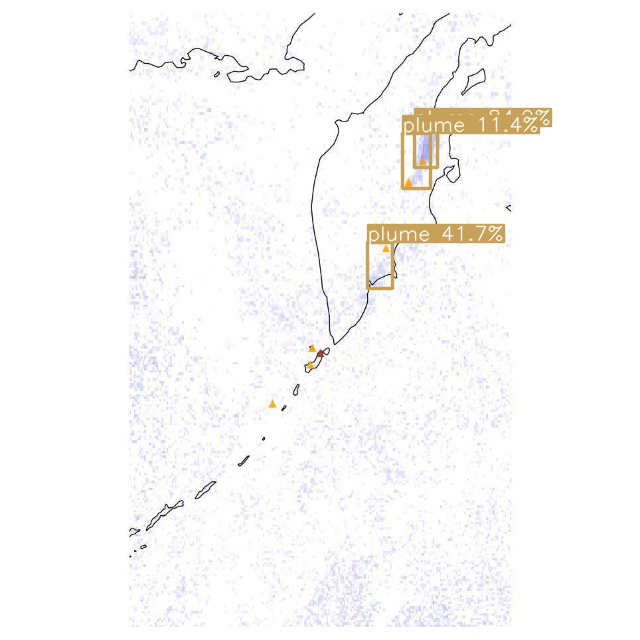

In [33]:
import numpy as np
from PIL import Image
import cv2
img = cv2.imread('/content/drive/MyDrive/Volcano/random_split_folders/split3/test/images/20220821_Ebeko_10_10_156_51_jpg.jpg')
img = cv2.resize(img ,(640,640))
img_array = np.array(img)
print(img_array.shape)
results = model.predict(img_array,conf=0.08,iou=0.51)

plot_img = plot_bboxes(img_array, results[0].boxes.boxes, conf=0.1)
plot_img.save('fail_pred4.jpg')
plot_img

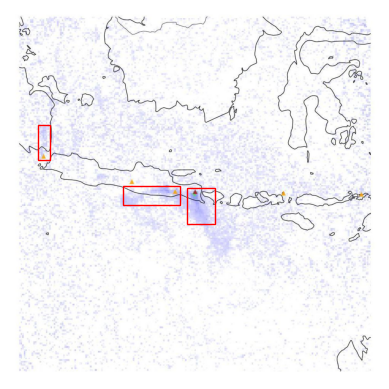

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
def visualize_bboxes(image_path, txt_path):
    image = Image.open(image_path)
    image_width, image_height = image.size
    with open(txt_path, 'r') as file:
        bboxes = file.readlines()

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for bbox in bboxes:
        class_id, x_center, y_center, width, height = [float(x) for x in bbox.strip().split()]

        x_center, y_center, width, height = x_center * image_width, y_center * image_height, width * image_width, height * image_height
        xmin, ymin = int(x_center - width/2), int(y_center - height/2)
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.axis('off')
    plt.savefig('fail_label1.jpg')
    plt.show()

image_file = "/content/drive/MyDrive/Volcano/random_split_folders/split3/test/images/20220709_Raung_10_10_114_-8_jpg.jpg"
txt_file = "/content/drive/MyDrive/Volcano/random_split_folders/split3/test/labels/20220709_Raung_10_10_114_-8_jpg.txt"
visualize_bboxes(image_file, txt_file)